In [1]:
import pandas as pd
import networkx as nx
import pickle 

import numpy as np
from heapq import heapify, heappush, heappop
from utils import first,path,dijkstra,new_graph,traceback,maps,links,create_path,visualizePath

from Utils_2_4 import new_graph_SumWeights,Min_cut

# We can start creating the needed first graph

In [12]:
answers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-a2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [13]:
startingTime=pd.to_datetime('2016-01-01')

In [14]:
answers["Date"]=pd.to_datetime(answers['Date'],unit='s')

In [15]:
Recent_answers=answers[(answers['Date'] >= startingTime) & (answers["Active_User"] != answers["Passive_User"])].copy()

In [16]:
Recent_answers["weight"]=1

In [17]:
g = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

# loading the comments on questions

In [21]:
comments_onQuestions=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [22]:
comments_onQuestions["Date"]=pd.to_datetime(comments_onQuestions['Date'],unit='s')

Selecting only the most recent comments

In [23]:
Recent_comments_onQuestions=comments_onQuestions[(comments_onQuestions['Date'] >= startingTime) & (comments_onQuestions["Active_User"] != comments_onQuestions["Passive_User"])].copy()

In [24]:
Recent_comments_onQuestions["weight"]=0.4

In [25]:
g2 = nx.from_pandas_edgelist(Recent_comments_onQuestions, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

# combining the multi-graph using the networkx library

In [32]:
G = nx.compose(g,g2)

# loading all the comments on answers

In [35]:
comments_onAnswers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2a.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [36]:
comments_onAnswers["Date"]=pd.to_datetime(comments_onAnswers['Date'],unit='s')

Selecting only the most recent comments

In [37]:
Recent_comments_onAnswers=comments_onAnswers[(comments_onAnswers['Date'] >= startingTime) & (comments_onAnswers["Active_User"] != comments_onAnswers["Passive_User"])].copy()

In [38]:
Recent_comments_onAnswers["weight"]=0.6

In [39]:
g3 = nx.from_pandas_edgelist(Recent_comments_onAnswers, "Active_User", "Passive_User", edge_attr="weight",edge_key="Date",create_using=nx.MultiDiGraph())

combining the multi-graph using the networkx library

In [50]:
final_G = nx.compose(g3,G)

In [53]:
pickle.dump(final_G, open('final_G', 'wb'))

# EX 2.3

Now since we are interested in the shortest walk path, we preprocess our graph, we make it a simple graph with interactions that happend in our desired interval, no more a multigraph.
we decided to do this because for this exercise we are interested only at the edge with the smallest weight between 2 node that happened in our desired interval of time.
And so we create this graph for each interval of time that we need to look for.

Also we decided to rename the nodes with numbers from 0 to n with n that is equal to the number of nodes

In [2]:
# Load graph
with open("final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

In [4]:
print(len(G_loaded.nodes()))

429318


In [5]:
print(len(G_loaded.edges()))

1854034


We rename the graph and we find randomly a sequence of nodes

In [3]:
dg,index,mapping=first(G_loaded)

We create the timestamps and launch the function

In [25]:
startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2016-01-08')

However this time, i want to choose a path 

In [26]:
index= [ 1543, 59, 10089 ]

In [28]:
path(0,3294,index,dg,startingTime,endTime,mapping)

the path is: 
[(0, 1543), (1543, 59), (59, 10089), (10089, 3294)]
smallest distance between 0 and 1543  0.6
smallest distance between 1543 and 59  0.6
smallest distance between 59 and 10089  2.0
smallest distance between 10089 and 3294  1.2


[0, 1543, 59, 7323, 1543, 10089, 1543, 3294]

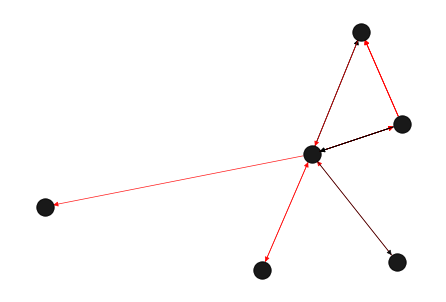

In [5]:
l=[0, 1543, 59, 7323, 1543, 10089, 1543, 3294]
p=create_path(l) 
H=dg.subgraph(l)
visualizePath(dg,l,p)

# Functionality 4

We create the timestamps to select the intervals

In [2]:
# Load graph
with open("/Users/simone/Desktop/final_G", 'rb') as f: 
    G_loaded = pickle.load(f)

In [3]:
startingTime1=pd.to_datetime('2016-01-01')
endTime1=pd.to_datetime('2016-01-02')
startingTime2=pd.to_datetime('2016-01-06')
endTime2=pd.to_datetime('2017-01-03')

startingTime=pd.to_datetime('2016-01-01')
endTime=pd.to_datetime('2018-01-03')

First there is the step where we rename the nodes (we use the same function used for implementing djkstra)

In [4]:
dg,mapping=maps(G_loaded)

 inside the Min_cut function, we preprocess the saved MultiDigraph, also in this case it's better to keep only one edge between two nodes.
So, we decided to make it a simple direct graph with edges that are interactions that happend during an interval of time and that have as a weight the sum of all happened interactions in that interval of time

Now we find the two users that i need

In [ ]:
user1,user2=findUser(startingTime1,endTime1,startingTime2,endTime1,dg)

Since we couldn't find the right 2 intervals of time, to get the 2 nodes, we decided to  disconnect 2 chosen nodes from the graph

In [ ]:
Min_cut(dg,0,190,startingTime,endTime,mapping)

smallest distance between 0 and 190  1.2
